# Word2vec词向量

In [1]:
#导入实验所需的工具包
import re
import jieba
import pandas as pd
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
import gensim
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)

## 数据预处理

In [2]:
df = pd.read_csv("online_shopping_10_cats.csv")[:60000]
df.head()

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...


In [3]:
#使用re正则提取中文并用jieba分词提取词语语料
extract_chinese = re.compile(r'[\u4e00-\u9fa5]+')
chinese_corpus_raw = df['review'].tolist()
chinese_corpus_raw
df['chinese_corpus']=[jieba.lcut("".join(extract_chinese.findall(str(corpus)))) for corpus in chinese_corpus_raw]
df.head()

Building prefix dict from the default dictionary ...
2022-06-03 15:30:34,023:DEBUG:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\23176\AppData\Local\Temp\jieba.cache
2022-06-03 15:30:34,026:DEBUG:Loading model from cache C:\Users\23176\AppData\Local\Temp\jieba.cache
Loading model cost 0.609 seconds.
2022-06-03 15:30:34,635:DEBUG:Loading model cost 0.609 seconds.
Prefix dict has been built successfully.
2022-06-03 15:30:34,637:DEBUG:Prefix dict has been built successfully.


,cat,label,review,chinese_corpus
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,"[做, 父母, 一定, 要, 有, 刘墉, 这样, 的, 心态, 不断, 地, 学习, 不断..."
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,"[作者, 真有, 英国人, 严谨, 的, 风格, 提出, 观点, 进行, 论述, 论证, 尽..."
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,"[作者, 长篇大论, 借用, 详细, 报告, 数据处理, 工作, 和, 计算结果, 支持, ..."
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,"[作者, 在, 战, 几时, 之前, 用, 了, 拥抱, 令人, 叫绝, 日本, 如果, 没..."
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,"[作者, 在, 少年, 时即, 喜, 阅读, 能, 看出, 他, 精读, 了, 无数, 经典..."


In [4]:
#将每条评论分词后整合到一个列表中，将每个词用空格隔开放入一个列表中
words_list = []
corpus = []
for corpu in df['chinese_corpus'].tolist():
    words_list.append(corpu)
    corpus.append(' '.join(corpu))
words_list[0]

['做',
 '父母',
 '一定',
 '要',
 '有',
 '刘墉',
 '这样',
 '的',
 '心态',
 '不断',
 '地',
 '学习',
 '不断',
 '地',
 '进步',
 '不断',
 '地',
 '给',
 '自己',
 '补充',
 '新鲜血液',
 '让',
 '自己',
 '保持',
 '一颗',
 '年轻',
 '的',
 '心',
 '我',
 '想',
 '这',
 '是',
 '他',
 '能',
 '很',
 '好',
 '的',
 '和',
 '孩子',
 '沟通',
 '的',
 '一个',
 '重要',
 '因素',
 '读',
 '刘墉',
 '的',
 '文章',
 '总能',
 '让',
 '我',
 '看到',
 '一个',
 '快乐',
 '的',
 '平易近人',
 '的',
 '父亲',
 '他',
 '始终',
 '站',
 '在',
 '和',
 '孩子',
 '同样',
 '的',
 '高度',
 '给',
 '孩子',
 '创造',
 '着',
 '一个',
 '充满',
 '爱',
 '和',
 '自由',
 '的',
 '生活',
 '环境',
 '很',
 '喜欢',
 '刘墉',
 '在',
 '字里行间',
 '流露出',
 '的',
 '做',
 '父母',
 '的',
 '那种',
 '小',
 '狡黠',
 '让',
 '人',
 '总是',
 '忍俊不禁',
 '父母',
 '和',
 '子女',
 '之间',
 '有时候',
 '也',
 '是',
 '一种',
 '战斗',
 '武力',
 '争斗',
 '过于',
 '低级',
 '了',
 '智力',
 '较量',
 '才',
 '更',
 '有',
 '趣味',
 '所以',
 '做',
 '父母',
 '的',
 '得',
 '加把劲',
 '了',
 '老',
 '思想',
 '老',
 '观念',
 '注定',
 '会',
 '一败涂地',
 '生命不息',
 '学习',
 '不止',
 '家庭教育',
 '真的',
 '是',
 '乐在其中']

## skip-gram构建词向量

In [5]:
#skip-gram构建词向量
skip_model = Word2Vec(sentences=words_list,sg=1 ,negative=10,vector_size=500, window=5, min_count=1, workers=4)
skip_model.save("skip.model")
skip_model = Word2Vec.load("skip.model")

2022-06-03 15:30:49,120:INFO:collecting all words and their counts
2022-06-03 15:30:49,120:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-03 15:30:49,177:INFO:PROGRESS: at sentence #10000, processed 379631 words, keeping 29235 word types
2022-06-03 15:30:49,228:INFO:PROGRESS: at sentence #20000, processed 666652 words, keeping 38407 word types
2022-06-03 15:30:49,269:INFO:PROGRESS: at sentence #30000, processed 867324 words, keeping 42195 word types
2022-06-03 15:30:49,302:INFO:PROGRESS: at sentence #40000, processed 1066310 words, keeping 47477 word types
2022-06-03 15:30:49,342:INFO:PROGRESS: at sentence #50000, processed 1242441 words, keeping 50332 word types
2022-06-03 15:30:49,430:INFO:collected 63744 word types from a corpus of 1722838 raw words and 60000 sentences
2022-06-03 15:30:49,431:INFO:Creating a fresh vocabulary
2022-06-03 15:30:49,650:INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 63744 unique words (100.00% of orig

2022-06-03 15:31:39,715:INFO:EPOCH 4 - PROGRESS: at 28.79% examples, 123356 words/s, in_qsize 8, out_qsize 0
2022-06-03 15:31:40,736:INFO:EPOCH 4 - PROGRESS: at 44.65% examples, 128453 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:41,787:INFO:EPOCH 4 - PROGRESS: at 60.53% examples, 131224 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:42,824:INFO:EPOCH 4 - PROGRESS: at 76.83% examples, 131476 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:43,873:INFO:EPOCH 4 - PROGRESS: at 88.39% examples, 131835 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:44,937:INFO:EPOCH 4 - PROGRESS: at 92.73% examples, 129867 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:45,951:INFO:EPOCH 4 - PROGRESS: at 96.91% examples, 128334 words/s, in_qsize 7, out_qsize 0
2022-06-03 15:31:46,653:INFO:EPOCH 4: training on 1722838 raw words (1416312 effective words) took 11.1s, 127690 effective words/s
2022-06-03 15:31:46,653:INFO:Word2Vec lifecycle event {'msg': 'training on 8614190 raw words (7083308 effe

In [6]:
#查看与给定词相似度最高的10个词
sims = skip_model.wv.most_similar('孩子', topn=10)
sims

[('宝宝', 0.818596601486206),
 ('小孩', 0.8021312355995178),
 ('大人', 0.7726424336433411),
 ('父母', 0.7704293727874756),
 ('儿子', 0.7631828188896179),
 ('小朋友', 0.7627369165420532),
 ('小孩子', 0.755376398563385),
 ('女儿', 0.7456046342849731),
 ('妈妈', 0.7416766881942749),
 ('家长', 0.7315623164176941)]

## 词向量可视化展示

In [7]:
from collections import Counter
#统计词频
words_all_list = []
for word_list in words_list:
    for word in word_list:
        if len(word)!=1:
            words_all_list.append(word)
counter = Counter(words_all_list)
#按照词频降序排列取前100个
words_freq = sorted(list(counter.items()),key = lambda x:x[1],reverse=True)
words_top100=list(dict(words_freq[:100]).keys())
#获得词频前100的词的词向量
vectors_top100 = skip_model.wv[words_top100]
vectors_top100[0]

array([-9.63533472e-04,  3.08847725e-01,  2.17242047e-01, -3.15669551e-02,
       -2.40764618e-01, -2.10673243e-01, -2.87210699e-02,  1.99883744e-01,
        1.15101904e-01,  1.56388119e-01,  4.52579260e-02,  1.94912955e-01,
       -1.04395011e-02, -3.98569852e-02,  9.28105116e-02, -8.20474476e-02,
        6.08142540e-02,  9.85509232e-02, -1.42001584e-01, -1.32267684e-01,
        7.53863901e-02,  9.34082025e-04,  3.84868145e-01,  7.39663467e-02,
        3.69062126e-02, -4.36517671e-02, -1.07947372e-01, -1.15842782e-02,
       -7.91159198e-02, -5.01922928e-02,  1.25287294e-01,  4.58126888e-02,
        5.52382991e-02,  5.05636893e-02,  1.57338724e-01,  3.28775406e-01,
        1.00260787e-01, -9.23958495e-02,  2.21496373e-02, -8.03652927e-02,
        4.12130617e-02,  1.96411274e-02, -3.11306477e-01,  3.50587405e-02,
       -2.39718720e-01,  5.64864650e-02, -7.53426924e-02,  8.76449421e-03,
       -6.42778203e-02,  1.32489577e-01, -1.44223310e-02,  1.07294023e-01,
       -2.49427810e-01, -

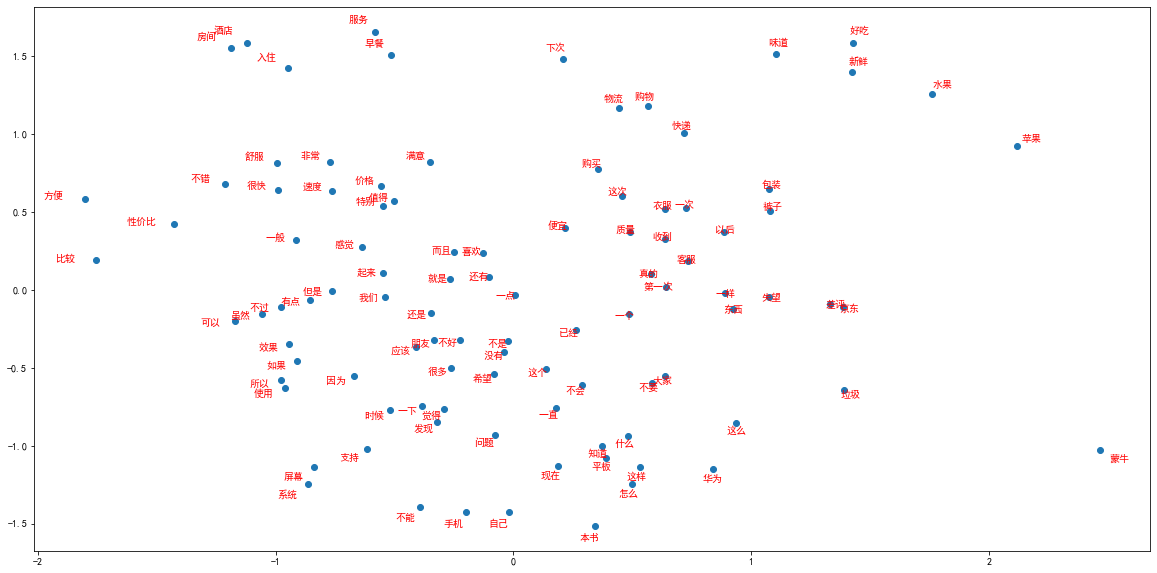

In [8]:
#使用PCA降维得到2维词向量
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_2d = pca.fit_transform(vectors_top100)
#词向量可视化展示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #图中文字体设置为黑体
plt.rcParams['axes.unicode_minus']=False #负值显示
plt.figure(figsize=(20,10))
plt.scatter(word_2d[:,0],word_2d[:,1])
for i in range(word_2d.shape[0]):
    plt.text(word_2d[i,0]*1.05, word_2d[i,1]*1.05, words_top100[i], fontsize=10, color = "r",  weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
plt.savefig('word_plot.png', dpi=300, bbox_inches='tight')